In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import adjusted_rand_score

In [2]:
df = pd.read_csv("iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Checking null values

In [3]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Splitting data

In [4]:
df1 = df.copy()
df1["species"] = df1["species"].replace({"setosa": 0, "versicolor": 1, "virginica": 2})

In [5]:
X= df1.drop("species", axis=1)
y = df1["species"]

Finding eps 

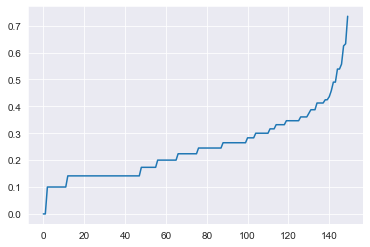

In [6]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
sns.set_style('darkgrid')
plt.plot(distances)

eps value should be chosen as the point having max curvature i. 04

Initializing model

In [7]:
db = DBSCAN(eps = 0.4, min_samples=4)

In [8]:
preds = db.fit(X)

In [9]:
preds = db.labels_
x = X.values

In [10]:
adjusted_rand_score(y, preds)

0.6841081459139292

In [11]:
preds

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1,  3,  1,  1,  3,  1, -1,  1, -1,  1,  1,  1,
       -1,  1,  2,  1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,
       -1,  1, -1,  1,  1,  1,  1,  1,  3,  1,  1,  1,  1,  3,  1, -1,  2,
        2,  2,  2, -1, -1, -1, -1, -1,  2,  2,  2,  2, -1,  2,  2, -1, -1,
       -1,  2,  2, -1,  2,  2, -1,  2,  2,  2, -1, -1, -1,  2,  2, -1, -1,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2],
      dtype=int64)

Calculating noise

In [12]:
noise = 0
for i in preds:
    if i== -1:
        noise+=1
noise

25

Plotting results

In [13]:
def plot(i,j):
    
    plt.figure(figsize=(14,6))
    plt.subplot(1,2,1)
    plt.scatter(x[y==0,i],x[y==0,j], c = 'red', s=50, label = "Setosa")
    plt.scatter(x[y==1,i],x[y==1,j], c = 'green', s=50, label = "Versiclor")
    plt.scatter(x[y==2,i],x[y==2,j], c = 'blue', s=50,label = "Virginica")
    plt.xlabel(X.columns[i])
    plt.ylabel(X.columns[j])
    plt.title("Original Data")
    plt.legend()
    
    plt.subplot(1,2,2)
    plt.scatter(x[preds==0,i],x[preds==0,j], c = 'red', s=50, label = "Setosa")
    plt.scatter(x[preds==1,i],x[preds==1,j], c = 'green',s=50, label = "Versiclor")
    plt.scatter(x[preds==2,i],x[preds==2,j], c = 'blue',s=50, label = "Virginica")
    plt.xlabel(X.columns[i])
    plt.ylabel(X.columns[j])
    plt.title("DBSCAN")
    plt.legend()
    

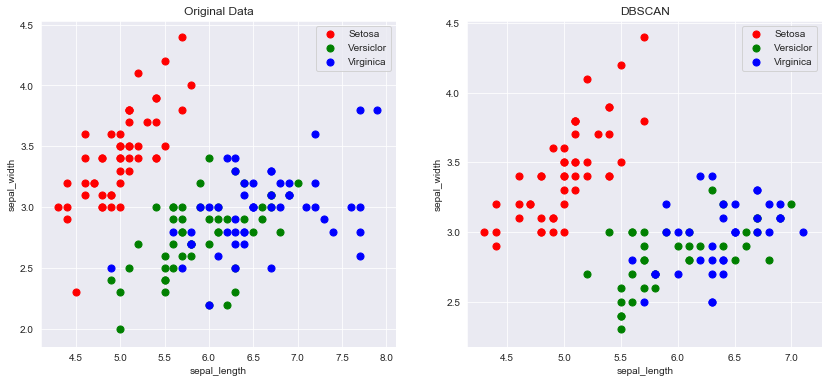

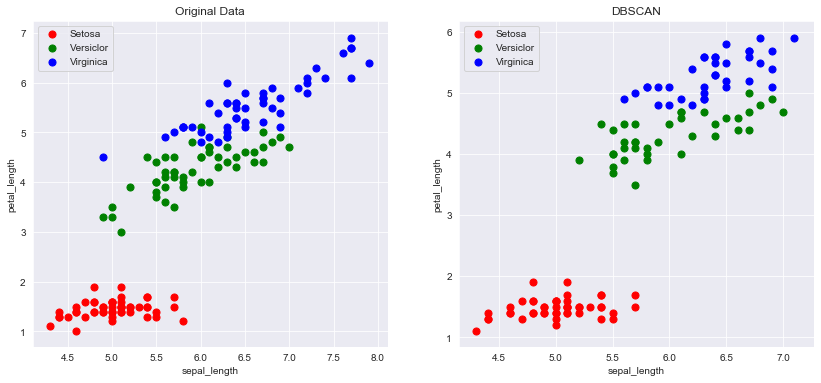

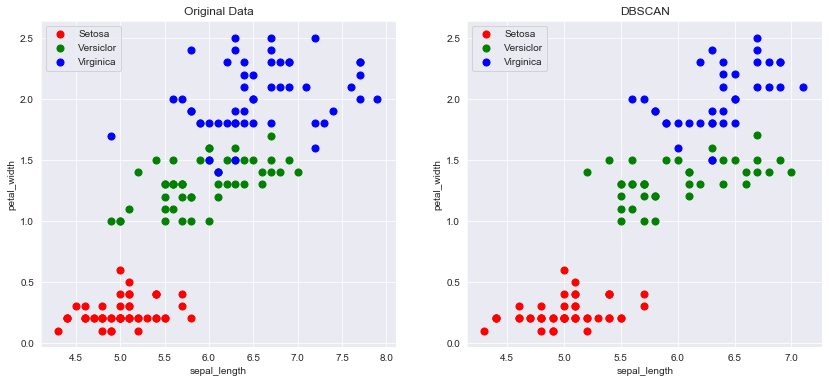

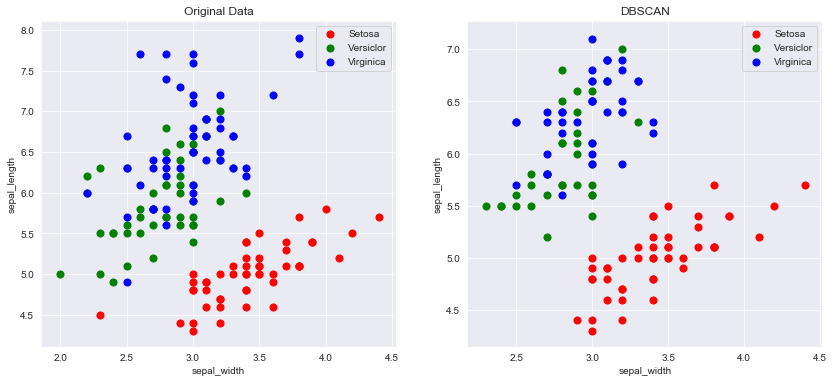

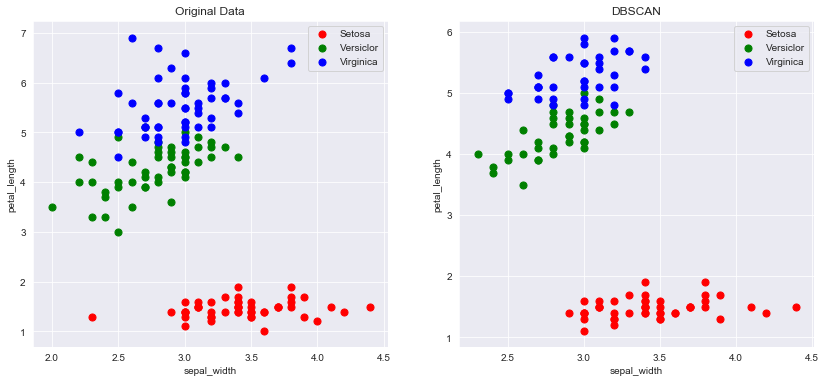

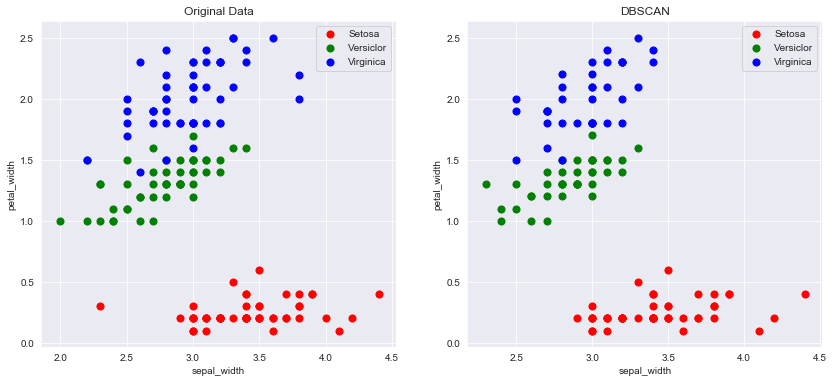

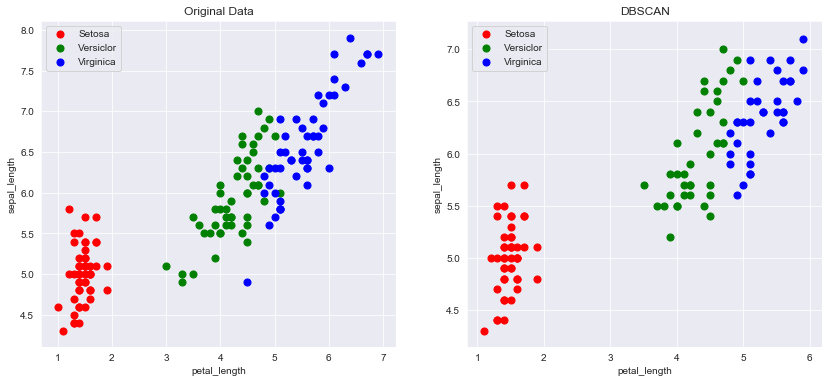

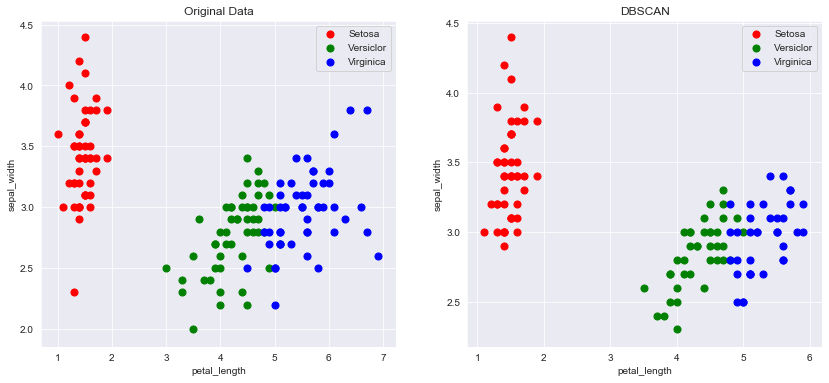

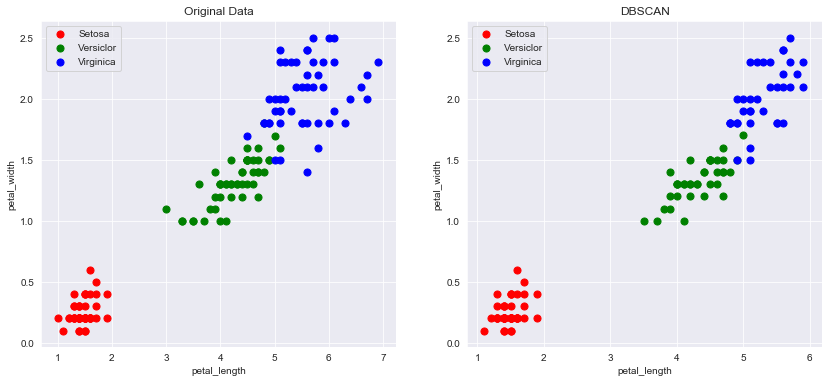

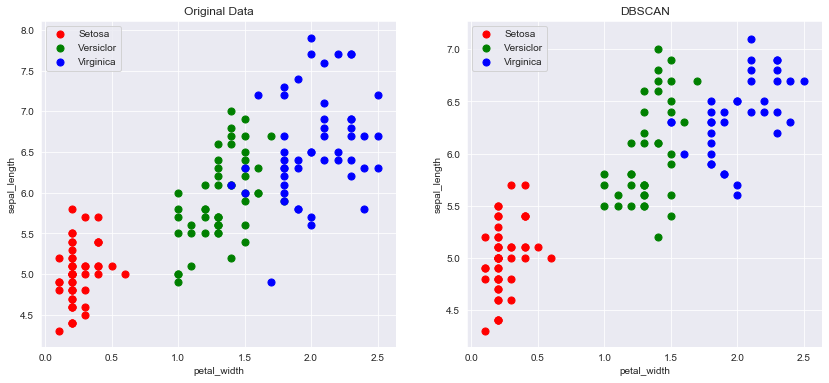

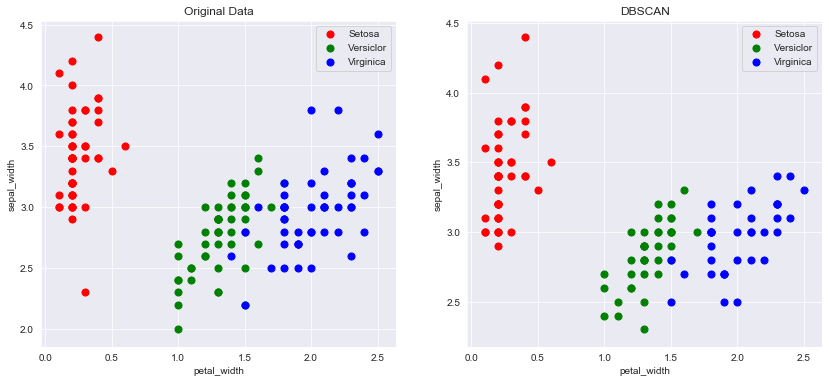

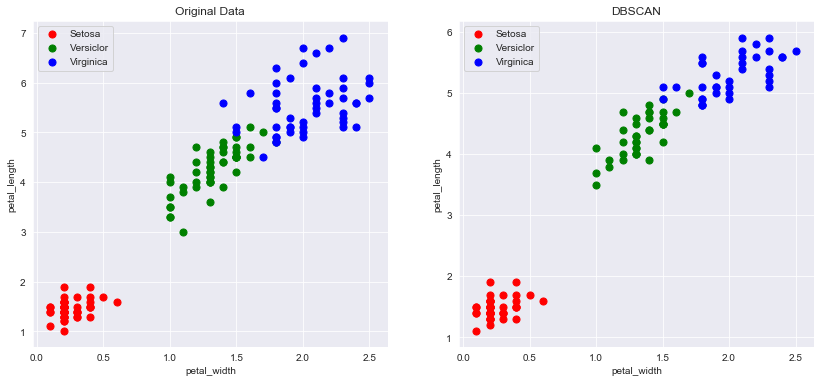

In [14]:
for i in range(4):
    for j in range(4):
        if(i!=j):
            plot(i,j)